In [1]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

import pickle

pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data_cleaned4.csv')

In [3]:
df

,fx_win,sig_str_ground_att_sum_diff,sig_str_ground_succ_sum_diff,age_diff,tds_succ_sum_diff,pass_sum_diff,tds_succ_per_min_diff,tds_att_sum_diff,reach_diff,pass_per_min_diff,sig_str_head_acc_diff,sig_str_dist_acc_diff,tot_str_succ_sum_diff,ufc_losses_diff,sig_str_head_succ_sum_diff,sig_str_ground_att_per_min_diff,sig_str_ground_succ_per_min_diff,tds_att_per_min_diff,fight_time_sum_diff,tds_acc_diff
0,0,8.0,6.0,-2.58,0.0,1.0,0.00,0.0,0.00,0.07,0.12,0.15,102.0,0,3.0,0.53,0.40,0.00,12.22,0.00
1,0,-1.0,-1.0,-4.59,-1.0,0.0,-0.10,1.0,-0.03,-0.03,-0.10,0.04,71.0,1,9.0,-0.10,-0.10,-0.01,5.28,-0.50
2,1,-113.0,-54.0,-3.88,-2.0,-4.0,0.03,-1.0,0.00,0.00,-0.11,0.02,-237.0,-1,-117.0,-1.86,-0.87,0.22,-39.80,-0.21
3,1,8.0,6.0,3.97,3.0,2.0,0.08,8.0,-0.03,0.06,-0.10,0.04,242.0,3,79.0,-6.49,-3.86,0.22,35.00,0.38
4,1,25.0,18.0,2.70,3.0,1.0,0.07,8.0,0.02,0.02,0.29,0.14,305.0,3,97.0,0.62,0.45,0.20,36.76,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,0,-27.0,-16.0,-4.75,-7.0,-5.0,-0.13,-20.0,0.15,-0.06,-0.03,0.06,-109.0,0,-45.0,-0.71,-0.41,-0.36,-10.04,-0.01
3628,1,0.0,4.0,-1.67,-8.0,-5.0,-0.18,-10.0,0.03,-0.10,0.09,-0.02,-113.0,3,-81.0,0.12,0.16,-0.22,-8.22,-0.80
3629,0,12.0,6.0,-4.20,1.0,1.0,0.02,1.0,0.00,0.02,-0.10,-0.09,106.0,1,8.0,0.09,0.05,0.02,30.00,1.00
3630,0,1.0,0.0,-5.13,-2.0,-1.0,-0.10,-6.0,0.02,-0.05,0.05,-0.06,-45.0,-1,-11.0,1.51,0.73,-0.31,-18.24,-0.33


In [4]:
cat_cols = ['weightclass_Bantamweight_x','weightclass_Catch Weight_x','weightclass_Featherweight_x',
          'weightclass_Flyweight_x','weightclass_Heavyweight_x','weightclass_Light Heavyweight_x',
          'weightclass_Lightweight_x','weightclass_Middleweight_x','weightclass_Open Weight_x',
          'weightclass_Strawweight_x','weightclass_Super Heavyweight_x','weightclass_Welterweight_x',
          'weightclass_Bantamweight_y','weightclass_Catch Weight_y','weightclass_Featherweight_y',
          'weightclass_Flyweight_y','weightclass_Heavyweight_y','weightclass_Light Heavyweight_y',
          'weightclass_Lightweight_y','weightclass_Middleweight_y','weightclass_Open Weight_y',
          'weightclass_Strawweight_y','weightclass_Super Heavyweight_y','weightclass_Welterweight_y',
          'stance_Open Stance_x','stance_Orthodox_x','stance_Sideways_x','stance_Southpaw_x','stance_Switch_x',
          'stance_Open Stance_y','stance_Orthodox_y','stance_Sideways_y','stance_Southpaw_y','stance_Switch_y']

In [91]:
df_num = df.drop(columns=cat_cols)
df_num.drop(columns=['fx_win'], inplace = True)
num_cols = df_num.columns

In [5]:
len(df.columns)

20

In [6]:
y = df[['fx_win']]

In [7]:
X = df.drop(columns=['fx_win'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=300, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=50)

In [12]:
col_tran = ColumnTransformer(
            [("standard", StandardScaler(), X.columns)],
                remainder='passthrough')

In [13]:
# X_train_s = pd.DataFrame(col_tran.fit_transform(X_train))
# X_val_s = pd.DataFrame(col_tran.transform(X_val))
# X_test_s = pd.DataFrame(col_tran.transform(X_test))

X_train_s = col_tran.fit_transform(X_train)
X_val_s = col_tran.transform(X_val)
X_test_s = col_tran.transform(X_test)

In [14]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train_s, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
score = log_reg.score(X_train_s, y_train)
score

0.6044029352901935

In [22]:
l2_reg = keras.regularizers.l2(0.01)

In [23]:
model2 = Sequential()
model2.add(Dense(16, activation='relu', input_dim=X_train_s.shape[1], kernel_regularizer=l2_reg))
# model2.add(Dropout(rate=0.3))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2_reg))
# model2.add(Dropout(rate=0.3))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2_reg))
# model2.add(Dropout(rate=0.3))
model2.add(Dense(16, activation='relu', kernel_regularizer=l2_reg))
# model2.add(Dropout(rate=0.3))
model2.add(Dense(1, activation='sigmoid'))

In [24]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [26]:
history2 = model2.fit(X_train_s, y_train, epochs=100, batch_size=64, validation_data=(X_val_s, y_val))

Train on 2998 samples, validate on 334 samples
Epoch 1/100
2998/2998 [==============================] - 1s 201us/step - loss: 1.5050 - accuracy: 0.5140 - val_loss: 1.3643 - val_accuracy: 0.5329
Epoch 2/100
2998/2998 [==============================] - 0s 87us/step - loss: 1.2534 - accuracy: 0.5567 - val_loss: 1.1515 - val_accuracy: 0.5539
Epoch 3/100
2998/2998 [==============================] - 0s 91us/step - loss: 1.0721 - accuracy: 0.5607 - val_loss: 1.0000 - val_accuracy: 0.5659
Epoch 4/100
2998/2998 [==============================] - 0s 92us/step - loss: 0.9450 - accuracy: 0.5740 - val_loss: 0.8955 - val_accuracy: 0.5479
Epoch 5/100
2998/2998 [==============================] - 0s 88us/step - loss: 0.8586 - accuracy: 0.5781 - val_loss: 0.8250 - val_accuracy: 0.5659
Epoch 6/100
2998/2998 [==============================] - 0s 85us/step - loss: 0.8004 - accuracy: 0.5777 - val_loss: 0.7785 - val_accuracy: 0.5629
Epoch 7/100
2998/2998 [==============================] - 0s 86us/step - loss

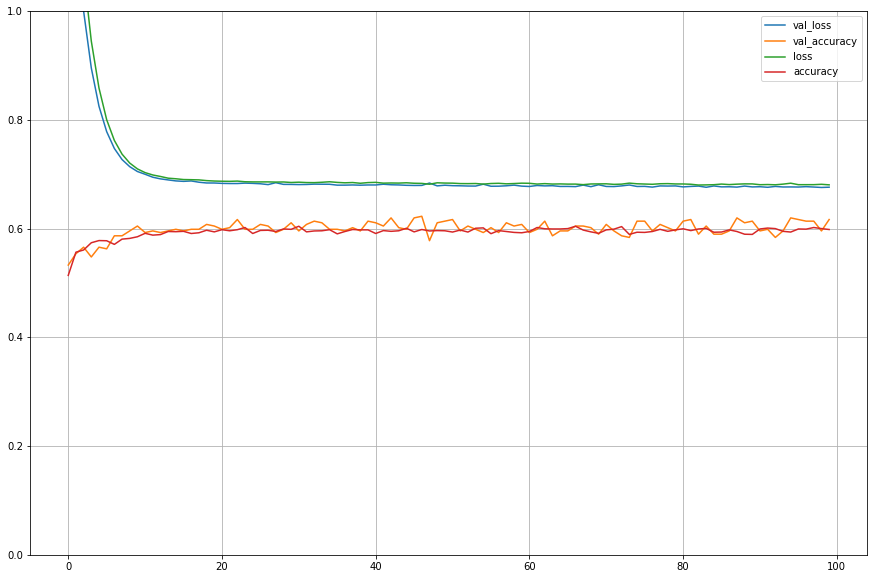

In [27]:
pd.DataFrame(history2.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [95]:
y_pred = model2.predict(X_test_s)

In [96]:
model2.evaluate(X_test_s, y_test)

700/700 [==============================] - 0s 84us/step


[1.03045939377376, 0.5185714364051819]

In [216]:
pickle.dump(model2, open('nn_first_iteration.pickle', 'wb'))